In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
# Changed to use the updated seaborn style format with a specific theme
plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
#load dataset
df_main = pd.read_csv('/content/car data.csv')

In [ ]:
df_main.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df_main.shape

(301, 9)

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#numerical stats
df_main.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
#missing values
df_main.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
df_main['Age'] = 2020 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)

In [ ]:
df_main.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

In [ ]:
df_main.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

Column 'Seller_Type' not found in DataFrame.


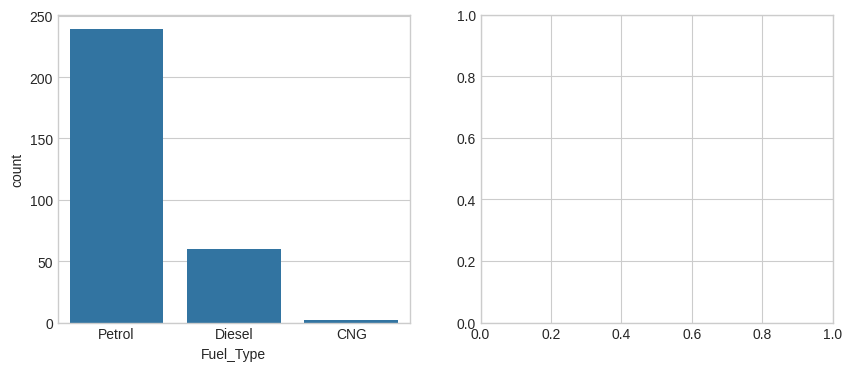

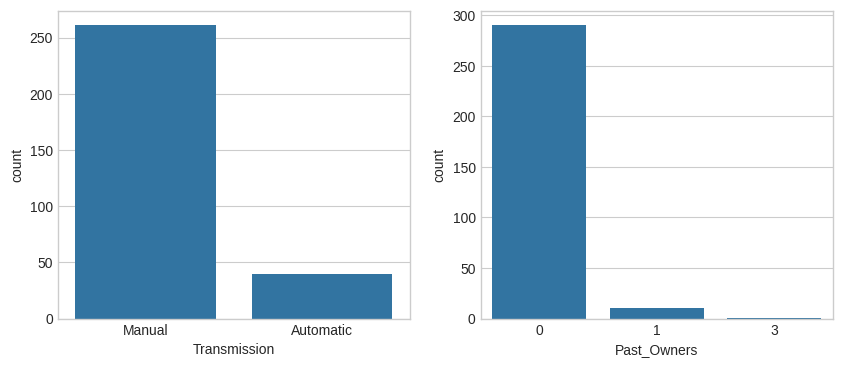

In [ ]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)

    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    # Check if the column exists in the DataFrame before plotting
    if cat_cols[i] in df_main.columns:
        sns.countplot(x=cat_cols[i], data=df_main)
    else:
        print(f"Column '{cat_cols[i]}' not found in DataFrame.")
    i += 1

    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    # Check if the column exists in the DataFrame before plotting
    if cat_cols[i] in df_main.columns:
        sns.countplot(x=cat_cols[i], data=df_main)
    else:
        print(f"Column '{cat_cols[i]}' not found in DataFrame.")
    i += 1

    plt.show()

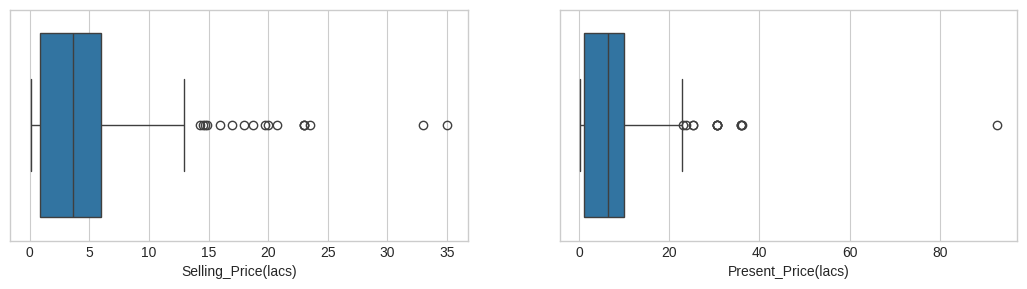

Column 'Kms_Driven' not found in DataFrame. Skipping...


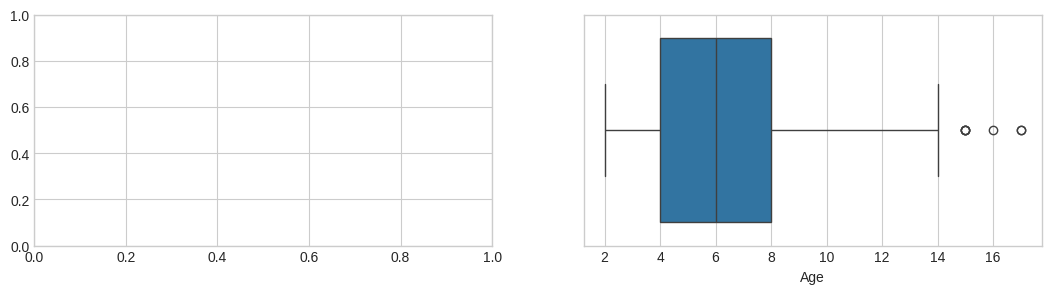

In [ ]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','Age']
i=0
while i < len(num_cols): #change 4 to len(num_cols)
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)

    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)

    # Ensure the column exists before plotting
    if num_cols[i] in df_main.columns:
        sns.boxplot(x=num_cols[i], data=df_main)
    else:
        print(f"Column '{num_cols[i]}' not found in DataFrame. Skipping...")
    i += 1

    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)

    # Ensure the column exists before plotting and i is within range
    if i < len(num_cols) and num_cols[i] in df_main.columns:
        sns.boxplot(x=num_cols[i], data=df_main)
    else:
        print(f"Column '{num_cols[i]}' not found in DataFrame or index out of range. Skipping...")
    i += 1

    plt.show()


In [ ]:
df_main[df_main['Present_Price(lacs)'] > df_main['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,10


In [ ]:
df_main[df_main['Selling_Price(lacs)'] > df_main['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,5
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,10


In [ ]:
# Check if the column name exists in the DataFrame
if 'Kms_Driven' in df_main.columns:
    # If it exists, proceed with the original code
    df_main[df_main['Kms_Driven'] > df_main['Kms_Driven'].quantile(0.99)]
else:
    # If it doesn't exist, print an informative message
    print("Column 'Kms_Driven' not found in the DataFrame.")
    # You can also consider alternative actions like:
    # - Raising an exception: raise KeyError("Column 'Kms_Driven' not found.")
    # - Using a different column: df_main[df_main['another_column'] > ...]
    # - Skipping this operation: pass

Column 'Kms_Driven' not found in the DataFrame.


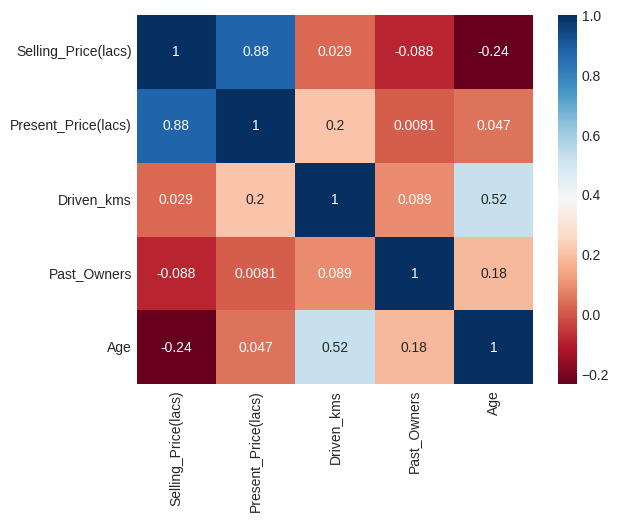

In [ ]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select only numeric columns for correlation calculation
numeric_df = df_main.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Plot heatmap using the correlation matrix of numeric features
sns.heatmap(corr_matrix, annot=True, cmap="RdBu")
plt.show()

In [ ]:
df_main.corr()['Selling_Price(lacs)']

ValueError: could not convert string to float: 'ritz'

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df_main.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Get the correlation with 'Selling_Price(lacs)'
correlation_with_selling_price = corr_matrix['Selling_Price(lacs)']

# Print the result
print(correlation_with_selling_price)

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878914
Driven_kms             0.029187
Past_Owners           -0.088344
Age                   -0.236141
Name: Selling_Price(lacs), dtype: float64


In [ ]:
# Check if the required columns exist before creating the pivot table
required_columns = ['Selling_Price(lacs)', 'Seller_Type', 'Fuel_Type']
if all(col in df_main.columns for col in required_columns):
    # If all columns exist, create the pivot table
    pivot_table_result = df_main.pivot_table(
        values='Selling_Price(lacs)', index='Seller_Type', columns='Fuel_Type'
    )
    print(pivot_table_result)  # Or display the result as needed
else:
    # If any column is missing, print an informative message
    missing_columns = [col for col in required_columns if col not in df_main.columns]
    print(f"Missing columns: {missing_columns}")
    print("Cannot create pivot table without these columns.")

Missing columns: ['Seller_Type']
Cannot create pivot table without these columns.


In [ ]:
# Check if the required columns exist before creating the pivot table
required_columns = ['Selling_Price(lacs)', 'Seller_Type', 'Transmission']
if all(col in df_main.columns for col in required_columns):
    # If all columns exist, create the pivot table
    pivot_table_result = df_main.pivot_table(
        values='Selling_Price(lacs)', index='Seller_Type', columns='Transmission'
    )
    print(pivot_table_result)  # Or display the result as needed
else:
    # If any column is missing, print an informative message
    missing_columns = [col for col in required_columns if col not in df_main.columns]
    print(f"Missing columns: {missing_columns}")
    print("Cannot create pivot table without these columns.")

Missing columns: ['Seller_Type']
Cannot create pivot table without these columns.


In [ ]:
df_main.drop(labels='Car_Name',axis= 1, inplace = True)

In [ ]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [ ]:
df_main = pd.get_dummies(data = df_main,drop_first=True)

In [ ]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


In [ ]:
# Separating target variable and its features
y = df_main['Selling_Price(lacs)']
X = df_main.drop('Selling_Price(lacs)',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)

    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))

    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))

    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))

    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))

    # Plotting Graphs
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.8990761  0.89776701 0.82981561 0.81795625 0.76012544]
Train CV mean : 0.84


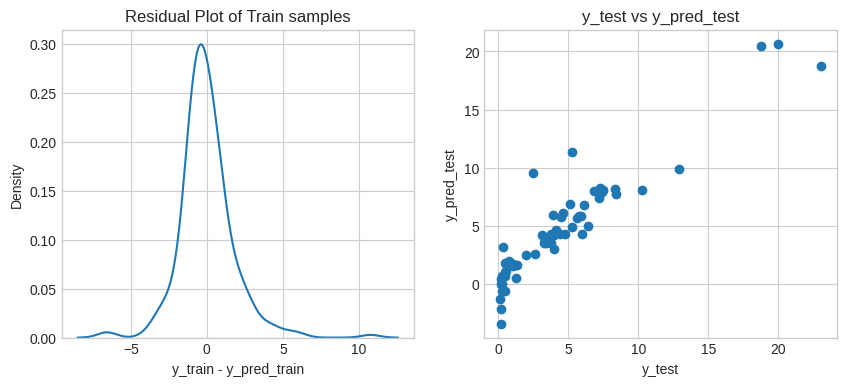

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89907549 0.89776791 0.82981785 0.81795705 0.73278673]
Train CV mean : 0.84


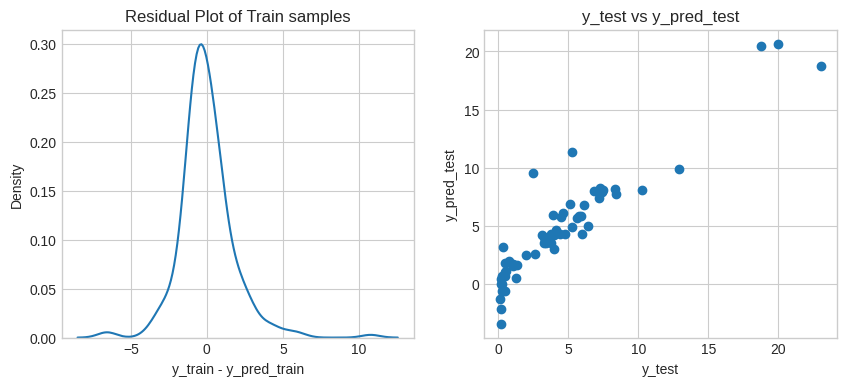

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89909444 0.89913326 0.83071332 0.81795538 0.70121811]
Train CV mean : 0.83


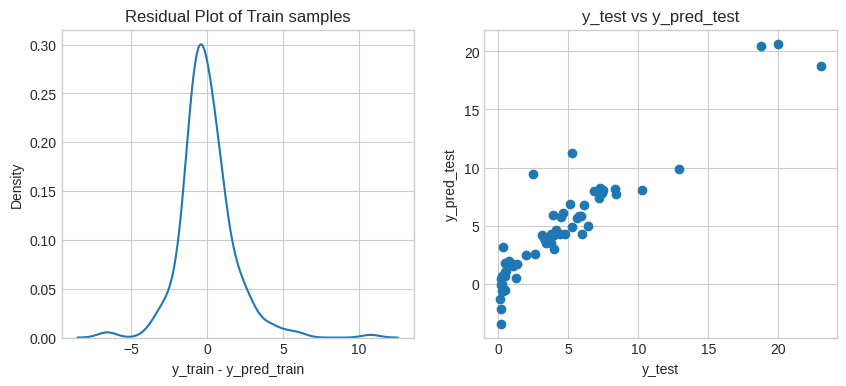

In [ ]:
car_pred_model(ls_rs,"lasso.pkl")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.88
Test R2-score : 0.91
Train CV scores : [0.90012761 0.86233312 0.80125922 0.8864471  0.62947662]
Train CV mean : 0.82


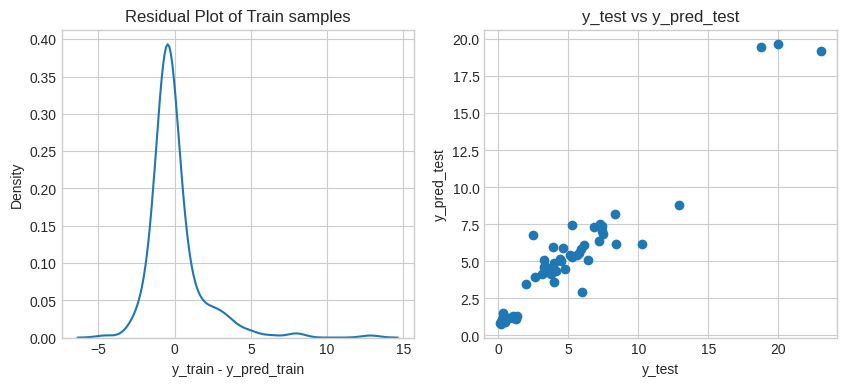

In [ ]:
car_pred_model(rf_rs,'random_forest.pkl')

In [ ]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_split=4,
                      n_estimators=700)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 1.0
Test R2-score : 0.94
Train CV scores : [0.94180025 0.95554309 0.903851   0.9077263  0.69584367]
Train CV mean : 0.88


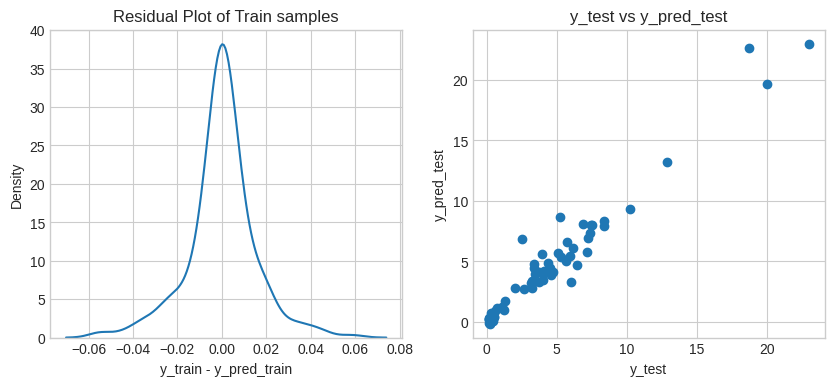

In [ ]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [ ]:
import pandas as pd

Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]

# Assuming R2_train and R2_test are lists, ensure they have 5 elements
# If they have more than 5, truncate to the first 5
R2_train = R2_train[:5] if isinstance(R2_train, list) and len(R2_train) > 5 else R2_train
R2_test = R2_test[:5] if isinstance(R2_test, list) and len(R2_test) > 5 else R2_test

# If they have less than 5, you need to investigate why and add the missing values
if isinstance(R2_train, list) and len(R2_train) < 5:
    print("Warning: R2_train has fewer than 5 elements. Check your data processing.")
    # Add a placeholder value for the missing values in R2_train
    R2_train.extend([None] * (5 - len(R2_train)))

if isinstance(R2_test, list) and len(R2_test) < 5:
    print("Warning: R2_test has fewer than 5 elements. Check your data processing.")
    # Add a placeholder value for the missing values in R2_test
    R2_test.extend([None] * (5 - len(R2_test)))

results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.88,0.86,0.84
1,Ridge,0.88,0.86,0.84
2,Lasso,0.88,0.86,0.83
3,RandomForestRegressor,0.93,0.95,0.82
4,GradientBoostingRegressor,0.88,0.91,0.88
